In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats 
import scipy.special as sc
import math
from scipy.stats import lognorm
from scipy.optimize import curve_fit  
from matplotlib import pyplot as plt

In [2]:
import pylab
params = {'backend': 'ps',
          'axes.labelsize': 27,
          'legend.fontsize': 27,
          'legend.handlelength': 2.0,
          'legend.borderaxespad': 0,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'font.family': 'serif',
          'font.size': 27,
          'font.weight': 'normal',
          'ps.usedistiller': 'xpdf',
          'text.usetex': False}
pylab.rcParams.update(params)
import warnings
warnings.filterwarnings('ignore')

# Plot depicting moisture-respiration curve for heterogeneity scenarios based on aggregate size, C and MB parameters

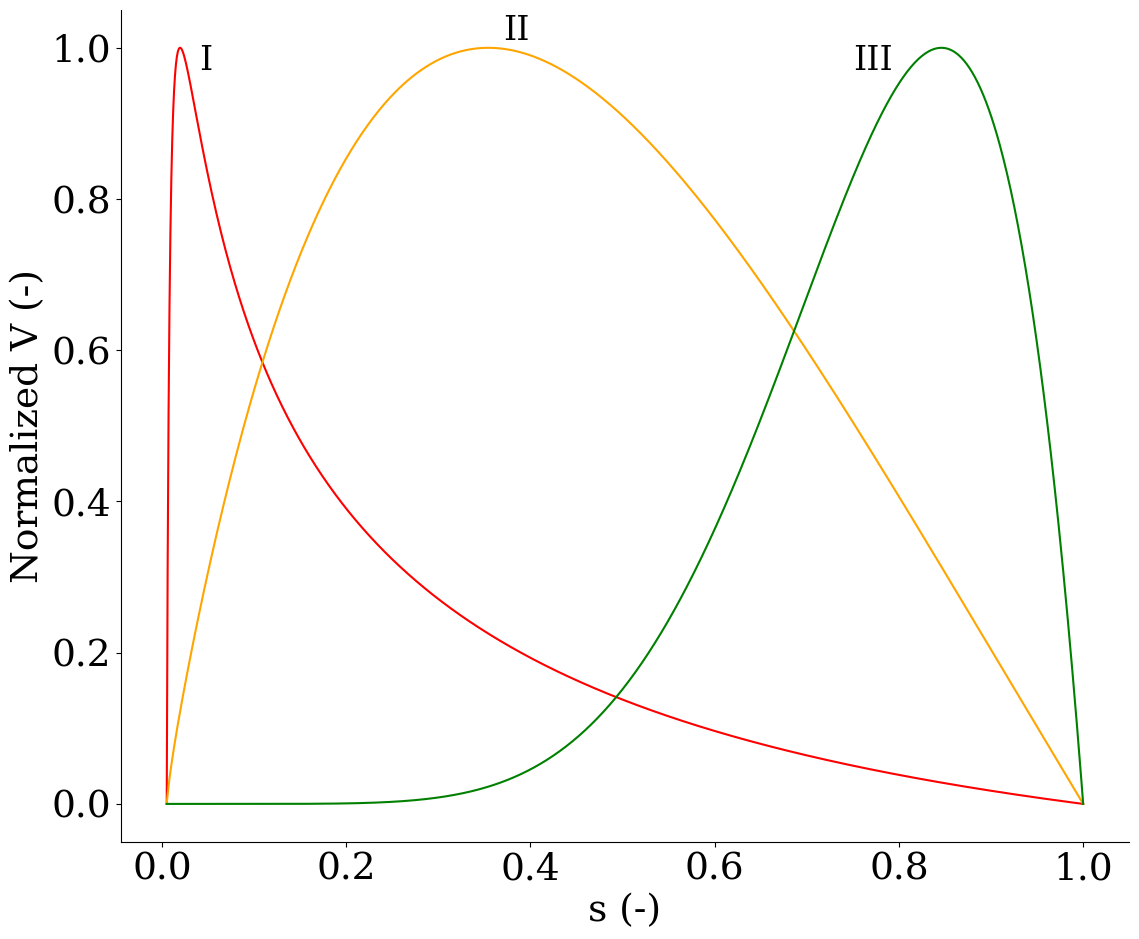

In [6]:
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(111) 

## Dw and Do coefficients for oxygen availability equation
Dw = 2.1*10**(-9) #m^2 s^-1 unit obtained from yan et al.
Do = 2.1*10**(-5) #m^2 s^-1 unit obtained from yan et al.

## Here we used the Ra_w = F^-1(s); where F is the CDF obtain the moisture-respiration curve for different heterogeneity scenarios. 
## Based on the Ra_w = F^-1(s) we obtain a relationship of Ra_w = 0.01*s for values of Ra_w commonly used in literature. 
s = np.linspace(0.0053,1,1000)
s_max = 1
## Equation of available oxygen
o = np.exp(-Do)*((0.01*s_max)-(0.01*s))


### HETEROGENEITY SCENARIO I
## For this case, we took two combinations of parameters (alphaR_a = 3,betaR_a = 0.50,beta_C=-0.75 and beta_MB=-0.75);
## (alphaR_a = 1.5,betaR_a = 0.50, beta_C=0, and beta_MB=0)
y1 = stats.gamma.cdf(s, a=0.50, scale=0.49) #(normal Gamma dist; a is alpha and scale is beta of v)
y2 = stats.gamma.cdf(0.0053, a=0.50, scale=0.49) #(Gamma dist at the starting s value; a is alpha and scale is beta of v)
y3 = stats.gamma.cdf(1, a=0.50, scale=0.49) #(Gamma dist at the end s value; a is alpha and scale is beta of v)
c1 = (y1-y2)/(y3-y2) #CDF of a truncated gamma distribution of the average respiration rate

## respiration rate expression
v_avg1 = o* np.exp(-Dw*(0.01*s))*(1/(0.01*s))*c1

##Estimating the maximum respiration rate
v_avgg1 = max(v_avg1)

##Normalizing the respiration rate with maximum respiration rate
yy1 = v_avg1/v_avgg1
q = plt.plot(s,yy1,color='red')
plt.text(0.04, 0.97, 'I', color='black', fontsize = 24)



### HETEROGENEITY SCENARIO II
## For this case, we took two combinations of parameters (alphaR_a = 3,betaR_a = 0.50,beta_C=0.5 and beta_MB=-0.50);
## (alphaR_a = 3,betaR_a = 0.50, beta_C=0, and beta_MB=0)
y4= stats.gamma.cdf(s, a=2, scale=0.49) #(normal Gamma dist; a is alpha and scale is beta of v )
y5 = stats.gamma.cdf(0.0053, a=2, scale=0.49) #(Gamma dist at the starting s value; a is alpha and scale is beta of v)
y6 = stats.gamma.cdf(1, a=2, scale=0.49) #(Gamma dist at the end s value; a is alpha and scale is beta of v)
c2 = (y4-y5)/(y6-y5) #CDF of a truncated distribution of avaerage respiration rate
v_avg2 = o* np.exp(-Dw*(0.01*s))*(1/(0.01*s))*c2

##Estimating the maximum respiration rate
v_avgg2 = max(v_avg2)

##Normalizing the respiration rate with maximum respiration rate
yy2 = v_avg2/v_avgg2
j = plt.plot(s,yy2,color='orange')
plt.text(0.37, 1.01, 'II', color='black', fontsize = 24)


### HETEROGENEITY SCENARIO III
## For this case, we took two combinations of parameters (alphaR_a = 3,betaR_a = 0.50,beta_C=3 and beta_MB=3);
## (alphaR_a = 9,betaR_a = 0.50, beta_C=0, and beta_MB=0)
y7 = stats.gamma.cdf(s, a=8, scale=0.49) #(normal Gamma dist; a is alpha and scale is beta of v)
y8 = stats.gamma.cdf(0.0053, a=8, scale=0.49) #(Gamma dist at the starting s value; a is alpha and scale is beta of v)
y9 = stats.gamma.cdf(1, a=8, scale=0.49) #(Gamma dist at the end s value; a is alpha and scale is beta of v)
c3 = (y7-y8)/(y9-y8) #CDF of a truncated distributionof avaerage respiration rate
v_avg3 = o* np.exp(-Dw*(0.01*s))*(1/(0.01*s))*c3

##Estimating the maximum respiration rate
v_avgg3 = max(v_avg3)

##Normalizing the respiration rate with maximum respiration rate
yy3 = v_avg3/v_avgg3
n = plt.plot(s,yy3,color='green')
plt.text(0.75, 0.97, 'III', color='black', fontsize = 24)



ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel(r's (-)')
ax1.set_ylabel(r'Normalized V (-)')


plt.tight_layout()
plt.show()